<a href="https://colab.research.google.com/github/saitejaroyal-tech/Student-Lifestyle-Value-Survey-Analysis/blob/main/jupiternotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [126]:
#Load the Dataset
df_lifestyle=pd.read_csv('/content/Student_Mental_Stress_and_Coping_Mechanisms.csv')

In [127]:
#Initial Data Exploration
df_lifestyle.columns
df_lifestyle.rename(columns={'Family Support  ':'Family Support','Student ID':'student_id'},inplace=True)
df_lifestyle.columns

Index(['student_id', 'Age', 'Gender', 'Academic Performance (GPA)',
       'Study Hours Per Week', 'Social Media Usage (Hours per day)',
       'Sleep Duration (Hours per night)',
       'Physical Exercise (Hours per week)', 'Family Support',
       'Financial Stress', 'Peer Pressure', 'Relationship Stress',
       'Mental Stress Level', 'Counseling Attendance', 'Diet Quality',
       'Stress Coping Mechanisms', 'Cognitive Distortions',
       'Family Mental Health History', 'Medical Condition', 'Substance Use'],
      dtype='object')

In [128]:
#exploring the dataset size
df_lifestyle.shape

(760, 20)

In [129]:
df_lifestyle.describe()


,Age,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,Relationship Stress,Mental Stress Level,Diet Quality,Cognitive Distortions,Substance Use
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,23.919737,1.996053,29.130263,4.234211,8.093421,4.934211,2.972368,3.021053,2.982895,2.963158,5.363158,3.042105,3.007895,2.996053
std,3.819392,1.416535,18.104662,2.565174,2.596838,3.082679,1.413477,1.452662,1.391096,1.369231,2.902856,1.453111,1.432703,1.385502
min,18.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,1.000000,13.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
50%,24.000000,2.000000,29.000000,4.000000,8.000000,5.000000,3.000000,3.000000,3.000000,3.000000,5.000000,3.000000,3.000000,3.000000
75%,27.000000,3.000000,45.000000,7.000000,10.000000,8.000000,4.000000,4.000000,4.000000,4.000000,8.000000,4.000000,4.000000,4.000000
max,30.000000,4.000000,60.000000,8.000000,12.000000,10.000000,5.000000,5.000000,5.000000,5.000000,10.000000,5.000000,5.000000,5.000000


In [130]:
#seperate daatframes
df_profile=df_lifestyle[['student_id', 'Age', 'Gender', 'Medical Condition']]
df_academic=df_lifestyle[['student_id', 'Academic Performance (GPA)', 'Study Hours Per Week']]
df_clinicalstatus=df_lifestyle[['student_id', 'Mental Stress Level', 'Cognitive Distortions', 'Counseling Attendance', 'Family Mental Health History']]
df_habits=df_lifestyle[['student_id', 'Sleep Duration (Hours per night)', 'Physical Exercise (Hours per week)', 'Diet Quality', 'Social Media Usage (Hours per day)', 'Substance Use']]
df_stress=df_lifestyle[['student_id', 'Financial Stress', 'Peer Pressure', 'Relationship Stress', 'Family Support']]
df_copymech=df_lifestyle[['student_id', 'Stress Coping Mechanisms']]

In [131]:
#data cleaning
df_lifestyle = df_lifestyle.dropna()
df_lifestyle = df_lifestyle.drop_duplicates()

df_lifestyle.isnull().sum()



,0
student_id,0
Age,0
Gender,0
Academic Performance (GPA),0
Study Hours Per Week,0
Social Media Usage (Hours per day),0
Sleep Duration (Hours per night),0
Physical Exercise (Hours per week),0
Family Support,0
Financial Stress,0


In [132]:
df_profile

,student_id,Age,Gender,Medical Condition
0,802-17-3671,22,Female,Yes
1,871-12-8572,25,Female,No
2,495-13-2672,24,Female,Yes
3,365-77-2496,20,Male,No
4,664-76-5622,28,Male,No
...,...,...,...,...
755,826-89-7993,24,Genderfluid,No
756,681-15-6754,23,Female,No
757,714-33-5373,23,Male,No
758,849-54-1252,29,Female,Yes


In [133]:
!pip install plotly
import cufflinks as cf
from IPython.display import display,HTML
cf.set_config_file(sharing='Public',theme='ggplot',offline=True)

In [134]:
#Stress Level Distribution
bins = [0, 3, 6, 10]
labels = ['Low stress (1-3)', 'Moderate stress (4-6)', 'High stress (7-10)']
df_clinicalstatus['Stress Category'] = pd.cut(df_clinicalstatus['Mental Stress Level'], bins=bins, labels=labels, include_lowest=True)
stress_counts=df_clinicalstatus['Stress Category'].value_counts()

In [135]:
stress_counts

,count
Stress Category,
High stress (7-10),290
Low stress (1-3),244
Moderate stress (4-6),226


<Axes: ylabel='count'>

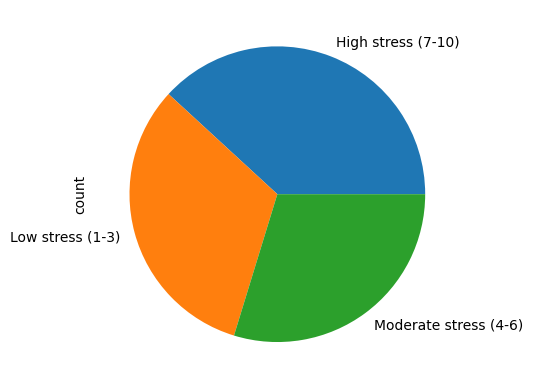

In [136]:
#stress level pie chart visualization
stress_counts.plot(kind='pie')

In [137]:
#evaluating social_media_usage to segregate low,medium,high usage boundaries
df_habits['Social Media Usage (Hours per day)'].value_counts()

,count
Social Media Usage (Hours per day),
7,99
8,93
5,92
2,88
6,85
4,85
3,75
0,73
1,70


In [143]:
#Social media usage distribution
# 0-2 hours (Low), 2-5 (Moderate), 5+ (Heavy)
usage_bins = [0, 2, 5, 24]
usage_labels = ['Low User', 'Moderate User', 'Heavy User']
df_lifestyle['Usage Level'] = pd.cut(df_lifestyle['Social Media Usage (Hours per day)'],
                           bins=usage_bins, labels=usage_labels, include_lowest=True)
df_habits['Usage Level'] = pd.cut(df_habits['Social Media Usage (Hours per day)'],
                           bins=usage_bins, labels=usage_labels, include_lowest=True)


In [144]:
average_stress_by_social_media = df_lifestyle.groupby('Usage Level')['Mental Stress Level'].mean().reset_index()
print("Average Mental Stress Level by Social Media Usage:")
print(average_stress_by_social_media)

Average Mental Stress Level by Social Media Usage:
     Usage Level  Mental Stress Level
0       Low User             5.337662
1  Moderate User             5.269841
2     Heavy User             5.469314


/tmp/ipython-input-135216659.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

